# Optimization for ML

In [1]:
using PyPlot;
using Distributions;
using LinearAlgebra;
include("stochastic-optimization.jl");
include("utilities.jl");
include("plotting-tools.jl");

In this notebook, you will implement a few subroutines for different optimization algorithms. The basic framework of the optimization algorithms is to solve problems of the form

minimize $f(x) = E[F(x; S)]$

where $F$ is a convex or weakly convex function and $S$ is a sample. The typical method we consider will iteratively minimize
$$
x_{k + 1} = \mbox{argmin}_x \left\{ F_{x_k}(x; S_k) + \frac{1}{2 \alpha_k} \|x - x_k\|^2\right\}.
$$
Here, the function $F_{x_0}$ indicates a <i>model</i> of the objective $F$ centered at the point 0. Recall that a model is an approximation to $F$ satisfying that

(i) $F_{x_0}(y) \le F(y)$ for all $y$

(ii) $F_{x_0}(x_0) = F(x_0)$

Mostly, we will consider three different models for the functions $F$ in our problems.

(i) Stochastic gradient (linear) models, which use
$$
F_x(y) = F(x) + \nabla F(x)^T (y - x)
$$

(ii) Truncated models, which set $F^\star = \inf_z F(z)$, and then use
$$
F_x(y) = \max\{F(x) + \nabla F(x)^T (y - x), F^\star\}.
$$

(iii) Proximal point models, which do not approximate $F$ at all, that is, they set
$$
F_x(y) = F(y).
$$

In this notebook, you will implement the update above for these models for different objectives, including linear regression, poisson regression, phase retrieval, and logistic regression.


# Linear Regression

Let's start with linear regression. Here, we have data in pairs $s = (a, b)$, where $a \in \mathbb{R}^n$ and $b \in \mathbb{R}$, and the instantaneous objective is the squared loss
$$
F(x; (a, b)) = \frac{1}{2} (a^T x - b)^2.
$$
This loss is natural for data of the form
$$
b_i = a_i^T x^\star + \varepsilon_i, ~~~
\varepsilon_i \sim \mathcal{N}(0, \sigma^2).
$$
In the first experiment, we will investigate the effects of the different models above (stochastic gradient, truncated, and proximal) when the data have no noise, that is, $\sigma^2 = 0$ above and there is an optimal $x^\star$ with $b = A x^\star$. In the second, we will look at a problem without a <i>perfect</i> solution, but which is well-conditioned, meaning the $a_i$ vectors are i.i.d. $\mathcal{N}(0, I)$. For the final experiment, we look at a slightly more poorly conditioned problem.

To solve these problems, you will need to edit the file linreg.jl, implementing the methods SGUpdateLinreg, TruncatedUpdateLinreg, and ProximalUpdateLinreg.

In [2]:
# First experiment:
# Linear regression experiment -- no noise, well-conditioned
stepsizes = logspace(-1.5, 3, 13);
n = 40;
m = 400;
# Run each of the methods above for linear regression,
# using stochastic gradient method (:sgm), truncated (:truncated)
# and proximal (:proximal). There is no noise in the observations.

In [3]:
# Implement the method SGUpdateLinreg in linreg.jl
# then run this code.
sg_gaps = StochOpt.MultiStepsizeExperiment(:linreg, :sgm,
                                           n_sample = m, dim = n,
                                           stepsizes = stepsizes,
                                           noise = 0.,
                                           condition = 1.);

*** Experiment 1 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.07498942093324558
	Init step = 0.1778279410038923
	Init step = 0.4216965034285822
	Init step = 1.0
	Init step = 2.371373705661656
	Init step = 5.623413251903491
	Init step = 13.33521432163324
	Init step = 31.622776601683793
	Init step = 74.98942093324558
	Init step = 177.82794100389228
	Init step = 421.6965034285823
	Init step = 1000.0
*** Experiment 2 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.07498942093324558
	Init step = 0.1778279410038923
	Init step = 0.4216965034285822
	Init step = 1.0
	Init step = 2.371373705661656
	Init step = 5.623413251903491
	Init step = 13.33521432163324
	Init step = 31.622776601683793
	Init step = 74.98942093324558
	Init step = 177.82794100389228
	Init step = 421.6965034285823
	Init step = 1000.0
*** Experiment 3 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.07498942093324558
	Init step = 0.1778279410038923
	Init step = 0.4216965034285822
	Init step = 1.0


In [4]:
# Implement the method TruncatedUpdateLinreg in linreg.jl. This method
# solves the model-based update above using the truncated model for linear
# regression.
trunc_gaps = StochOpt.MultiStepsizeExperiment(:linreg, :truncated,
                                              n_sample = m, dim = n,
                                              stepsizes = stepsizes,
                                              noise = 0.,
                                              condition = 1.);


*** Experiment 1 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.07498942093324558
	Init step = 0.1778279410038923
	Init step = 0.4216965034285822
	Init step = 1.0
	Init step = 2.371373705661656
	Init step = 5.623413251903491
	Init step = 13.33521432163324
	Init step = 31.622776601683793
	Init step = 74.98942093324558
	Init step = 177.82794100389228
	Init step = 421.6965034285823
	Init step = 1000.0
*** Experiment 2 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.07498942093324558
	Init step = 0.1778279410038923
	Init step = 0.4216965034285822
	Init step = 1.0
	Init step = 2.371373705661656
	Init step = 5.623413251903491
	Init step = 13.33521432163324
	Init step = 31.622776601683793
	Init step = 74.98942093324558
	Init step = 177.82794100389228
	Init step = 421.6965034285823
	Init step = 1000.0
*** Experiment 3 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.07498942093324558
	Init step = 0.1778279410038923
	Init step = 0.4216965034285822
	Init step = 1.0


In [5]:
# Implement the method ProximalUpdateLinreg in linreg.jl. This method
# solves the model-based update above using the true objective.
prox_gaps = StochOpt.MultiStepsizeExperiment(:linreg, :proximal,
                                             n_sample = m, dim = n,
                                             stepsizes = stepsizes,
                                             noise = 0.,
                                             condition = 1.);


*** Experiment 1 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.07498942093324558
	Init step = 0.1778279410038923
	Init step = 0.4216965034285822
	Init step = 1.0
	Init step = 2.371373705661656
	Init step = 5.623413251903491
	Init step = 13.33521432163324
	Init step = 31.622776601683793
	Init step = 74.98942093324558
	Init step = 177.82794100389228
	Init step = 421.6965034285823
	Init step = 1000.0
*** Experiment 2 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.07498942093324558
	Init step = 0.1778279410038923
	Init step = 0.4216965034285822
	Init step = 1.0
	Init step = 2.371373705661656
	Init step = 5.623413251903491
	Init step = 13.33521432163324
	Init step = 31.622776601683793
	Init step = 74.98942093324558
	Init step = 177.82794100389228
	Init step = 421.6965034285823
	Init step = 1000.0
*** Experiment 3 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.07498942093324558
	Init step = 0.1778279410038923
	Init step = 0.4216965034285822
	Init step = 1.0


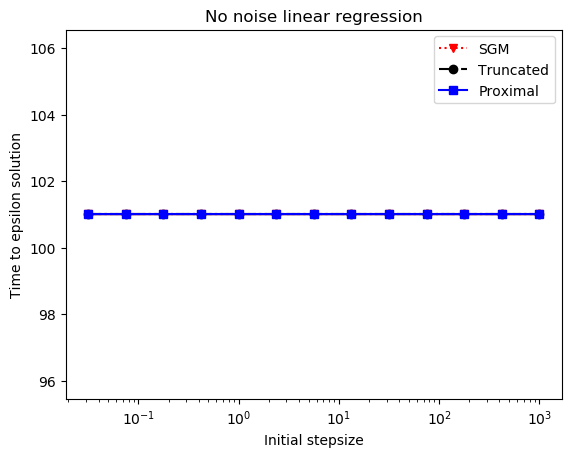

In [6]:
# Now plot the results of the above. What do you observe?
PlotTimesToEpsilon(sg_gaps, trunc_gaps, prox_gaps, stepsizes = stepsizes,
                   eps_threshold = 1e-2, confidence_width=.4);
legend();
xlabel("Initial stepsize");
ylabel("Time to epsilon solution");
title("No noise linear regression");

In [7]:
# Second experiment: linear regression with some noise.
#
# If the methods above are implemented correctly, the next few
# coding bits are just trivial "run this." Now, we will do linear
# regression with some noise.
stepsizes = logspace(-1.5, 2, 13);
n = 40;
m = 400;
sg_gaps = StochOpt.MultiStepsizeExperiment(:linreg, :sgm,
                                           n_sample = m, dim = n,
                                           stepsizes = stepsizes,
                                           noise = 1.,
                                           condition = 1.);
trunc_gaps = StochOpt.MultiStepsizeExperiment(:linreg, :truncated,
                                              n_sample = m, dim = n,
                                              stepsizes = stepsizes,
                                              noise = 1.,
                                              condition = 1.);
prox_gaps = StochOpt.MultiStepsizeExperiment(:linreg, :proximal,
                                             n_sample = m, dim = n,
                                             stepsizes = stepsizes,
                                             noise = 1.,
                                             condition = 1.);

*** Experiment 1 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.061896581889126064
	Init step = 0.12115276586285882
	Init step = 0.23713737056616552
	Init step = 0.46415888336127786
	Init step = 0.9085175756516871
	Init step = 1.7782794100389228
	Init step = 3.4807005884284115
	Init step = 6.812920690579611
	Init step = 13.33521432163324
	Init step = 26.101572156825373
	Init step = 51.089697745069266
	Init step = 100.0
*** Experiment 2 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.061896581889126064
	Init step = 0.12115276586285882
	Init step = 0.23713737056616552
	Init step = 0.46415888336127786
	Init step = 0.9085175756516871
	Init step = 1.7782794100389228
	Init step = 3.4807005884284115
	Init step = 6.812920690579611
	Init step = 13.33521432163324
	Init step = 26.101572156825373
	Init step = 51.089697745069266
	Init step = 100.0
*** Experiment 3 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.061896581889126064
	Init step = 0.12115276586285882
	Init

	Init step = 1.7782794100389228
	Init step = 3.4807005884284115
	Init step = 6.812920690579611
	Init step = 13.33521432163324
	Init step = 26.101572156825373
	Init step = 51.089697745069266
	Init step = 100.0
*** Experiment 2 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.061896581889126064
	Init step = 0.12115276586285882
	Init step = 0.23713737056616552
	Init step = 0.46415888336127786
	Init step = 0.9085175756516871
	Init step = 1.7782794100389228
	Init step = 3.4807005884284115
	Init step = 6.812920690579611
	Init step = 13.33521432163324
	Init step = 26.101572156825373
	Init step = 51.089697745069266
	Init step = 100.0
*** Experiment 3 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.061896581889126064
	Init step = 0.12115276586285882
	Init step = 0.23713737056616552
	Init step = 0.46415888336127786
	Init step = 0.9085175756516871
	Init step = 1.7782794100389228
	Init step = 3.4807005884284115
	Init step = 6.812920690579611
	Init step = 13.33521432163324
	Init 

	Init step = 0.9085175756516871
	Init step = 1.7782794100389228
	Init step = 3.4807005884284115
	Init step = 6.812920690579611
	Init step = 13.33521432163324
	Init step = 26.101572156825373
	Init step = 51.089697745069266
	Init step = 100.0
*** Experiment 2 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.061896581889126064
	Init step = 0.12115276586285882
	Init step = 0.23713737056616552
	Init step = 0.46415888336127786
	Init step = 0.9085175756516871
	Init step = 1.7782794100389228
	Init step = 3.4807005884284115
	Init step = 6.812920690579611
	Init step = 13.33521432163324
	Init step = 26.101572156825373
	Init step = 51.089697745069266
	Init step = 100.0
*** Experiment 3 of 20 ***
	Init step = 0.03162277660168379
	Init step = 0.061896581889126064
	Init step = 0.12115276586285882
	Init step = 0.23713737056616552
	Init step = 0.46415888336127786
	Init step = 0.9085175756516871
	Init step = 1.7782794100389228
	Init step = 3.4807005884284115
	Init step = 6.812920690579611
	Init

	Init step = 26.101572156825373
	Init step = 51.089697745069266
	Init step = 100.0


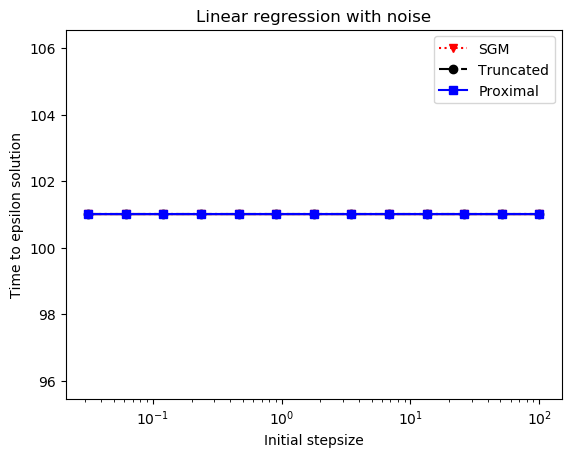

In [8]:
# Plots the results of these experiments once they complete.
# What do you observe?
PlotTimesToEpsilon(sg_gaps, trunc_gaps, prox_gaps, stepsizes = stepsizes,
                   eps_threshold = .05, confidence_width=.4);
legend();
xlabel("Initial stepsize");
ylabel("Time to epsilon solution");
title("Linear regression with noise");

In [9]:
# Final linear regression experiment: linear regression with noise
# and a condition number of 15 in the data matrix.
#
# If the methods above are implemented correctly, the next few
# coding bits are just trivial "run this."

stepsizes = logspace(-2, 2, 13);
n = 40;
m = 400;
sg_gaps = StochOpt.MultiStepsizeExperiment(:linreg, :sgm,
                                           n_sample = m, dim = n,
                                           stepsizes = stepsizes,
                                           noise = 1.,
                                           condition = 15.,
                                           maxiter = 40 * m);
trunc_gaps = StochOpt.MultiStepsizeExperiment(:linreg, :truncated,
                                              n_sample = m, dim = n,
                                              stepsizes = stepsizes,
                                              noise = 1.,
                                              condition = 15.,
                                              maxiter = 40 * m);
prox_gaps = StochOpt.MultiStepsizeExperiment(:linreg, :proximal,
                                             n_sample = m, dim = n,
                                             stepsizes = stepsizes,
                                             noise = 1.,
                                             condition = 15.,
                                             maxiter = 40 * m);

*** Experiment 1 of 20 ***
	Init step = 0.01
	Init step = 0.021544346900318846
	Init step = 0.046415888336127774
	Init step = 0.1
	Init step = 0.21544346900318828
	Init step = 0.4641588833612781
	Init step = 1.0
	Init step = 2.1544346900318843
	Init step = 4.6415888336127775
	Init step = 10.0
	Init step = 21.544346900318846
	Init step = 46.41588833612777
	Init step = 100.0
*** Experiment 2 of 20 ***
	Init step = 0.01
	Init step = 0.021544346900318846
	Init step = 0.046415888336127774
	Init step = 0.1
	Init step = 0.21544346900318828
	Init step = 0.4641588833612781
	Init step = 1.0
	Init step = 2.1544346900318843
	Init step = 4.6415888336127775
	Init step = 10.0
	Init step = 21.544346900318846
	Init step = 46.41588833612777
	Init step = 100.0
*** Experiment 3 of 20 ***
	Init step = 0.01
	Init step = 0.021544346900318846
	Init step = 0.046415888336127774
	Init step = 0.1
	Init step = 0.21544346900318828
	Init step = 0.4641588833612781
	Init step = 1.0
	Init step = 2.1544346900318843
	Ini

	Init step = 0.4641588833612781
	Init step = 1.0
	Init step = 2.1544346900318843
	Init step = 4.6415888336127775
	Init step = 10.0
	Init step = 21.544346900318846
	Init step = 46.41588833612777
	Init step = 100.0
*** Experiment 5 of 20 ***
	Init step = 0.01
	Init step = 0.021544346900318846
	Init step = 0.046415888336127774
	Init step = 0.1
	Init step = 0.21544346900318828
	Init step = 0.4641588833612781
	Init step = 1.0
	Init step = 2.1544346900318843
	Init step = 4.6415888336127775
	Init step = 10.0
	Init step = 21.544346900318846
	Init step = 46.41588833612777
	Init step = 100.0
*** Experiment 6 of 20 ***
	Init step = 0.01
	Init step = 0.021544346900318846
	Init step = 0.046415888336127774
	Init step = 0.1
	Init step = 0.21544346900318828
	Init step = 0.4641588833612781
	Init step = 1.0
	Init step = 2.1544346900318843
	Init step = 4.6415888336127775
	Init step = 10.0
	Init step = 21.544346900318846
	Init step = 46.41588833612777
	Init step = 100.0
*** Experiment 7 of 20 ***
	Init st

	Init step = 0.4641588833612781
	Init step = 1.0
	Init step = 2.1544346900318843
	Init step = 4.6415888336127775
	Init step = 10.0
	Init step = 21.544346900318846
	Init step = 46.41588833612777
	Init step = 100.0
*** Experiment 8 of 20 ***
	Init step = 0.01
	Init step = 0.021544346900318846
	Init step = 0.046415888336127774
	Init step = 0.1
	Init step = 0.21544346900318828
	Init step = 0.4641588833612781
	Init step = 1.0
	Init step = 2.1544346900318843
	Init step = 4.6415888336127775
	Init step = 10.0
	Init step = 21.544346900318846
	Init step = 46.41588833612777
	Init step = 100.0
*** Experiment 9 of 20 ***
	Init step = 0.01
	Init step = 0.021544346900318846
	Init step = 0.046415888336127774
	Init step = 0.1
	Init step = 0.21544346900318828
	Init step = 0.4641588833612781
	Init step = 1.0
	Init step = 2.1544346900318843
	Init step = 4.6415888336127775
	Init step = 10.0
	Init step = 21.544346900318846
	Init step = 46.41588833612777
	Init step = 100.0
*** Experiment 10 of 20 ***
	Init s

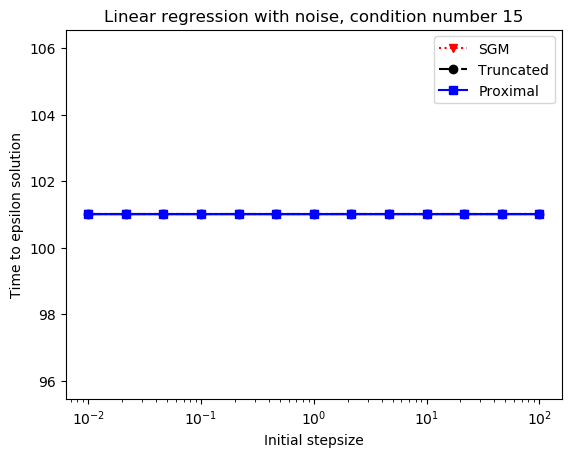

In [10]:
PlotTimesToEpsilon(sg_gaps, trunc_gaps, prox_gaps, stepsizes = stepsizes,
                   eps_threshold = .15, confidence_width=.25);
legend();
xlabel("Initial stepsize");
ylabel("Time to epsilon solution");
title("Linear regression with noise, condition number 15");


# Poisson regression

In poisson regression, we model count data as a linear model. Recall that a random variable $B \in \mathbb{N}$ is poisson distributed with parameter $\lambda$ if it has p.m.f.
$$
p(b \mid \lambda) = \frac{e^{-\lambda} \lambda^b}{b!}.
$$
For data $a \in \mathbb{R}^n$, we parameterize an observation $b$ by taking the $\lambda$ parameter, which must be positive, as $\lambda = e^{a^T x}$, so that we have the model
$$
p(b \mid a, x) = \frac{e^{-e^{a^T x}} e^{b a^T x}}{b!},
$$
which naturally gives rise to the loss
$$
F(x; (a, b)) = -\log p(b \mid a, x) = -b a^T x + e^{a^T x} - \log(b!).
$$
In this set of coding exercises, we explore the behavior of different modeling approaches for this objective $F$.

In [11]:
# Code for the poisson regression experiment.
stepsizes = logspace(-1, 2.5, 13);
n = 40;
m = 400;

In [12]:
# First part: implement the stochastic gradient method for the
# poisson regression objective above. For this, you will need
# to complete the method SGUpdatePoisson in poissonreg.jl
sg_gaps = StochOpt.MultiStepsizeExperiment(:poisson, :sgm,
                                           n_sample = m, dim = n,
                                           stepsizes=stepsizes);

*** Experiment 1 of 20 ***
	Init step = 0.1
	Init step = 0.19573417814876606
	Init step = 0.3831186849557287
	Init step = 0.7498942093324559
	Init step = 1.467799267622069
	Init step = 2.872984833353666
	Init step = 5.623413251903491
	Init step = 11.006941712522103
	Init step = 21.54434690031882
	Init step = 42.169650342858226
	Init step = 82.5404185268019
	Init step = 161.5598098439873
	Init step = 316.22776601683796
*** Experiment 2 of 20 ***
	Init step = 0.1
	Init step = 0.19573417814876606
	Init step = 0.3831186849557287
	Init step = 0.7498942093324559
	Init step = 1.467799267622069
	Init step = 2.872984833353666
	Init step = 5.623413251903491
	Init step = 11.006941712522103
	Init step = 21.54434690031882
	Init step = 42.169650342858226
	Init step = 82.5404185268019
	Init step = 161.5598098439873
	Init step = 316.22776601683796
*** Experiment 3 of 20 ***
	Init step = 0.1
	Init step = 0.19573417814876606
	Init step = 0.3831186849557287
	Init step = 0.7498942093324559
	Init step = 1.

In [13]:
# Implement the truncated method for Poisson regression.
# In particular, complete the method TruncatedUpdatePoisson
# in poissonreg.jl
trunc_gaps = StochOpt.MultiStepsizeExperiment(:poisson, :truncated,
                                              stepsizes=stepsizes);

*** Experiment 1 of 20 ***
	Init step = 0.1
	Init step = 0.19573417814876606
	Init step = 0.3831186849557287
	Init step = 0.7498942093324559
	Init step = 1.467799267622069
	Init step = 2.872984833353666
	Init step = 5.623413251903491
	Init step = 11.006941712522103
	Init step = 21.54434690031882
	Init step = 42.169650342858226
	Init step = 82.5404185268019
	Init step = 161.5598098439873
	Init step = 316.22776601683796
*** Experiment 2 of 20 ***
	Init step = 0.1
	Init step = 0.19573417814876606
	Init step = 0.3831186849557287
	Init step = 0.7498942093324559
	Init step = 1.467799267622069
	Init step = 2.872984833353666
	Init step = 5.623413251903491
	Init step = 11.006941712522103
	Init step = 21.54434690031882
	Init step = 42.169650342858226
	Init step = 82.5404185268019
	Init step = 161.5598098439873
	Init step = 316.22776601683796
*** Experiment 3 of 20 ***
	Init step = 0.1
	Init step = 0.19573417814876606
	Init step = 0.3831186849557287
	Init step = 0.7498942093324559
	Init step = 1.

In [14]:
# Implement the stochastic prox-point method for Poisson regression.
# In particular, complete the method ProximalUpdatePoisson
# in poissonreg.jl. This is the hardest of the exercises; you may
# wish to skip it at first.
prox_gaps = StochOpt.MultiStepsizeExperiment(:poisson, :proximal,
                                             stepsizes=stepsizes);

*** Experiment 1 of 20 ***
	Init step = 0.1
	Init step = 0.19573417814876606
	Init step = 0.3831186849557287
	Init step = 0.7498942093324559
	Init step = 1.467799267622069
	Init step = 2.872984833353666
	Init step = 5.623413251903491
	Init step = 11.006941712522103
	Init step = 21.54434690031882
	Init step = 42.169650342858226
	Init step = 82.5404185268019
	Init step = 161.5598098439873
	Init step = 316.22776601683796
*** Experiment 2 of 20 ***
	Init step = 0.1
	Init step = 0.19573417814876606
	Init step = 0.3831186849557287
	Init step = 0.7498942093324559
	Init step = 1.467799267622069
	Init step = 2.872984833353666
	Init step = 5.623413251903491
	Init step = 11.006941712522103
	Init step = 21.54434690031882
	Init step = 42.169650342858226
	Init step = 82.5404185268019
	Init step = 161.5598098439873
	Init step = 316.22776601683796
*** Experiment 3 of 20 ***
	Init step = 0.1
	Init step = 0.19573417814876606
	Init step = 0.3831186849557287
	Init step = 0.7498942093324559
	Init step = 1.

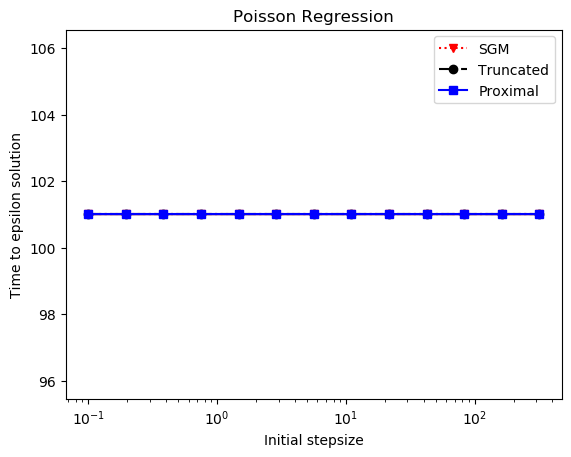

In [15]:
# Plot the results of the experiments above. What do you observe?
PlotTimesToEpsilon(sg_gaps, trunc_gaps, prox_gaps, stepsizes = stepsizes,
                   eps_threshold = 1e-1, confidence_width = .3);
legend();
xlabel("Initial stepsize");
ylabel("Time to epsilon solution");
title("Poisson Regression");


# Phase Retrieval
We now move beyond convexity and consider phase retrieval problems. In the phase retrieval problem, one wishes to recover a vector $x \in \mathbb{C}^n$ from measurements without the phase--that is, magnitude measurements only. (These arise in various physical applications.) In this case, for a measurement vector $a_i \in \mathbb{C}^n$ and "true" vector $x_\star \in \mathbb{C}^n$, we observe magnitudes
$$
b_i = |a_i^* x_\star|^2
$$
where $\cdot^*$ denotes the Hermitian transpose of its argument. We will work with real vectors for simplicity. In this case, for a data matrix $A \in \mathbb{R}^{m \times n}$ (whose rows are the measurement vectors $a_i$), we have
$$
b = (Ax)^2,
$$
where $(\cdot)^2$ denotes elementwise squaring. Then a natural objective to minimize is the average $\ell_1$-loss,
$$
f(x) = \frac{1}{m} \|(Ax)^2 - b\|_1 = \frac{1}{m} \sum_{i = 1}^m F(x; a_i, b_i)
$$
where the function
$$
F(x; (a, b)) = |(a^T x)^2 - b|.
$$

Note that this is of the convex composite form, that is, $F(x) = h(c(x))$, where $h$ is convex and $c$ is smooth, where we have $h(z) = |z|$ and $c(x) = (a^T x)^2 - b$. It is clear that $\inf_x F(x; (a, b)) = 0$ for $b \ge 0$, so we can implement each of methods above. (Even the proximal point method.) We consider each in turn.

Recall that for a function of composite form $F(x) = h(c(x))$, its (Frechet) subgradients are always of the form
$$
\partial F(x) = \nabla c(x) \partial h(c(x)).
$$
This makes computing the gradients of $F$ above particularly easy.

In [16]:
# Setup phase retrieval experiment
stepsizes = logspace(-1, 4, 13);
n = 40;
m = 400;

In [17]:
# First part: implement the stochastic gradient method for the
# phase retrieval objective above. For this, you will need
# to complete the method SGUpdatePhaseRetrieval in phase-retrieval.jl
sg_gaps = StochOpt.MultiStepsizeExperiment(:phase, :sgm,
                                           n_sample = m, dim = n,
                                           stepsizes=stepsizes);

*** Experiment 1 of 20 ***
	Init step = 0.1
	Init step = 0.2610157215682537
	Init step = 0.6812920690579611
	Init step = 1.7782794100389228
	Init step = 4.6415888336127775
	Init step = 12.115276586285889
	Init step = 31.622776601683793
	Init step = 82.5404185268019
	Init step = 215.44346900318823
	Init step = 562.341325190349
	Init step = 1467.7992676220706
	Init step = 3831.1868495572853
	Init step = 10000.0
*** Experiment 2 of 20 ***
	Init step = 0.1
	Init step = 0.2610157215682537
	Init step = 0.6812920690579611
	Init step = 1.7782794100389228
	Init step = 4.6415888336127775
	Init step = 12.115276586285889
	Init step = 31.622776601683793
	Init step = 82.5404185268019
	Init step = 215.44346900318823
	Init step = 562.341325190349
	Init step = 1467.7992676220706
	Init step = 3831.1868495572853
	Init step = 10000.0
*** Experiment 3 of 20 ***
	Init step = 0.1
	Init step = 0.2610157215682537
	Init step = 0.6812920690579611
	Init step = 1.7782794100389228
	Init step = 4.6415888336127775
	I

In [18]:
# Second part: implement the truncated update for the phase
# retrieval objective. You should complete the method
# TruncatedUpdatePhaseRetrieval in phase-retrieval.jl
trunc_gaps = StochOpt.MultiStepsizeExperiment(:phase, :truncated,
                                              n_sample = m, dim = n,
                                              stepsizes=stepsizes);


*** Experiment 1 of 20 ***
	Init step = 0.1
	Init step = 0.2610157215682537
	Init step = 0.6812920690579611
	Init step = 1.7782794100389228
	Init step = 4.6415888336127775
	Init step = 12.115276586285889
	Init step = 31.622776601683793
	Init step = 82.5404185268019
	Init step = 215.44346900318823
	Init step = 562.341325190349
	Init step = 1467.7992676220706
	Init step = 3831.1868495572853
	Init step = 10000.0
*** Experiment 2 of 20 ***
	Init step = 0.1
	Init step = 0.2610157215682537
	Init step = 0.6812920690579611
	Init step = 1.7782794100389228
	Init step = 4.6415888336127775
	Init step = 12.115276586285889
	Init step = 31.622776601683793
	Init step = 82.5404185268019
	Init step = 215.44346900318823
	Init step = 562.341325190349
	Init step = 1467.7992676220706
	Init step = 3831.1868495572853
	Init step = 10000.0
*** Experiment 3 of 20 ***
	Init step = 0.1
	Init step = 0.2610157215682537
	Init step = 0.6812920690579611
	Init step = 1.7782794100389228
	Init step = 4.6415888336127775
	I

In [19]:
# Third part: implement the proximal update for the phase
# retrieval objective. You should complete the method
# ProximalUpdatePhaseRetrieval in phase-retrieval.jl
prox_gaps = StochOpt.MultiStepsizeExperiment(:phase, :proximal,
                                             n_sample = m, dim = n,
                                             stepsizes=stepsizes);


*** Experiment 1 of 20 ***
	Init step = 0.1
	Init step = 0.2610157215682537
	Init step = 0.6812920690579611
	Init step = 1.7782794100389228
	Init step = 4.6415888336127775
	Init step = 12.115276586285889
	Init step = 31.622776601683793
	Init step = 82.5404185268019
	Init step = 215.44346900318823
	Init step = 562.341325190349
	Init step = 1467.7992676220706
	Init step = 3831.1868495572853
	Init step = 10000.0
*** Experiment 2 of 20 ***
	Init step = 0.1
	Init step = 0.2610157215682537
	Init step = 0.6812920690579611
	Init step = 1.7782794100389228
	Init step = 4.6415888336127775
	Init step = 12.115276586285889
	Init step = 31.622776601683793
	Init step = 82.5404185268019
	Init step = 215.44346900318823
	Init step = 562.341325190349
	Init step = 1467.7992676220706
	Init step = 3831.1868495572853
	Init step = 10000.0
*** Experiment 3 of 20 ***
	Init step = 0.1
	Init step = 0.2610157215682537
	Init step = 0.6812920690579611
	Init step = 1.7782794100389228
	Init step = 4.6415888336127775
	I

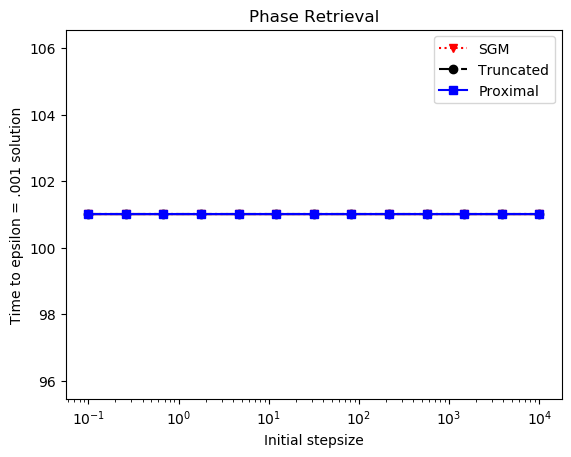

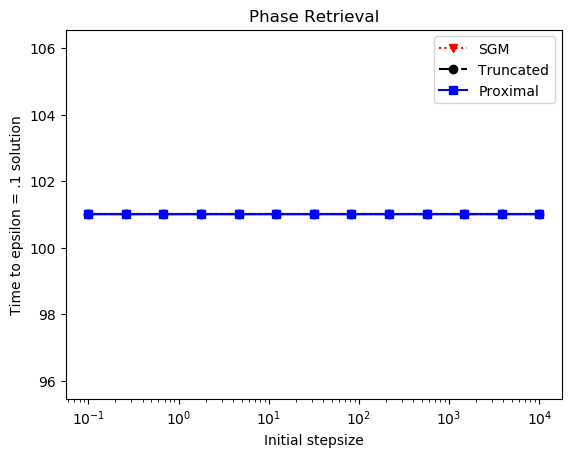

In [20]:
# Finally, plot your results. What do you observe for different accuracy levels?
PlotTimesToEpsilon(sg_gaps, trunc_gaps, prox_gaps, stepsizes = stepsizes,
                   eps_threshold = 1e-3, confidence_width = .45);
legend();
xlabel("Initial stepsize");
ylabel("Time to epsilon = .001 solution");
title("Phase Retrieval");

PlotTimesToEpsilon(sg_gaps, trunc_gaps, prox_gaps, stepsizes = stepsizes,
                   eps_threshold = 1e-1, confidence_width = .45);
legend();
xlabel("Initial stepsize");
ylabel("Time to epsilon = .1 solution");
title("Phase Retrieval");
